In [64]:
import cv2
import os 
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
TEMPLATES_DIR = '/Users/apple/Downloads/icons'
IMAGES_DIR = '/Users/apple/Downloads/images'
images = os.listdir(IMAGES_DIR)
templs = os.listdir(TEMPLATES_DIR)

# img_uri = os.path.join(IMAGES_DIR, images[0])
# img = cv2.imread(img_uri, 0)

# scale_percent = 60 # percent of original size
# width = int(img.shape[1] * scale_percent / 100)
# height = int(img.shape[0] * scale_percent / 100)
# dim = (width, height)

# resize image
# resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



In [68]:
def match_template(im_path, tmpl_path, method = cv2.TM_SQDIFF):
    """
        Match a template and return an annoted image.
    """
    templ = cv2.imread(tmpl_path, 0)
    img = cv2.imread(im_path, 0)
    
    w, h = templ.shape[::-1]

    res = cv2.matchTemplate(img,templ,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_CCOEFF]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    return img, min_val, max_val, min_loc, max_loc


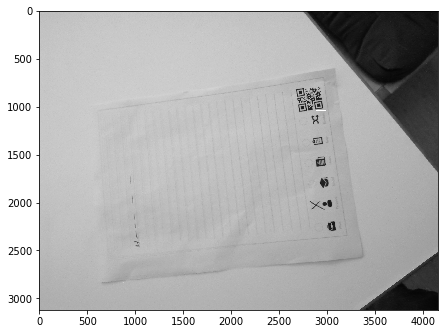

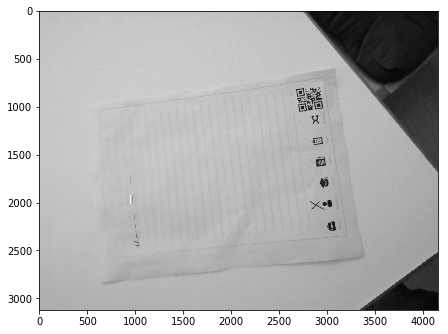

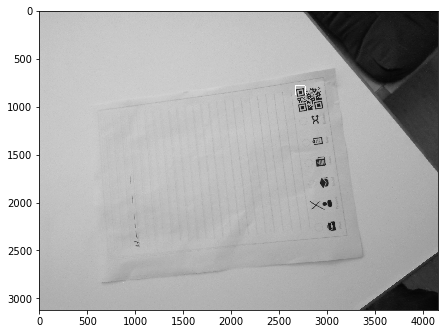

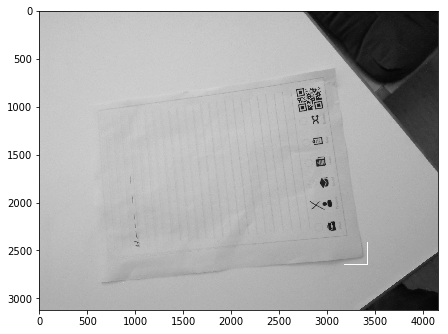

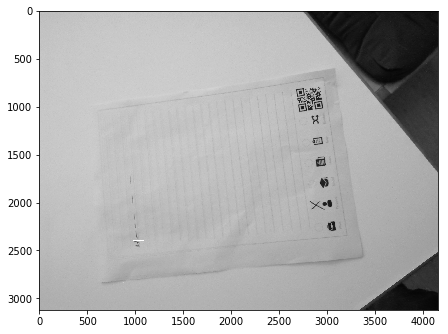

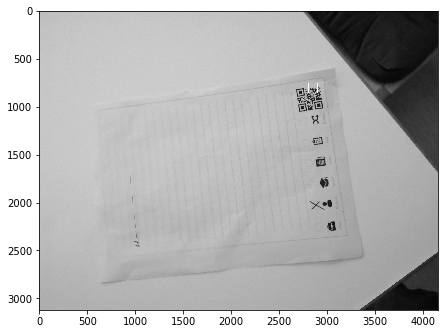

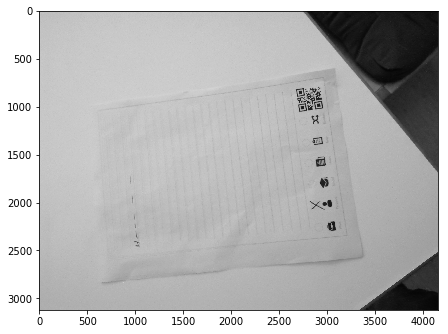

In [77]:
for ind, templ_name in enumerate(templs):
    templ_uri = os.path.join(TEMPLATES_DIR, templ_name)
    img_uri = os.path.join(IMAGES_DIR, images[0])
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
                'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    method = eval(methods[1])
    img, min_val, max_val, min_loc, max_loc = match_template(img_uri, templ_uri)
    fig = plt.figure(ind)
#     fig = plt.gcf()
    fig.set_size_inches(9.5, 5.5)
    plt.imshow(img, cmap='gray')